In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Vitamin_SimFns as vp
%matplotlib inline

# Math for Parents

## Problem:

A bottle of 180 children's vitamins is divided into three colors (orange, pink, and purple) 
and four animal shapes (cat, lion, hippo, elephant). Every day, 2 children are presented a selection 
of 10 vitamins, poured from the top of the jar, from which each selects 2 vitamins, for 
a total of 4 eaten per day. (The unselected vitamins are returned to the jar.)

If Child A only wants purple vitamins (without regard to shape) and Child B only wants cat 
vitamins (without regard to color), what are the odds each will be pleased with the selection on
- Day 1?
- Day 20? 
- Day 45? 

For extra credit, at what point in the life of the bottle do the odds of direct conflict between 
the children over their choices (i.e., the only purple vitamins are cats or vice-versa) rise above 
50%? Does it matter which child is allowed to choose first?

Problem by Jean Kahler, 3/30/3016, Analysis by Nathan Vierling-Claassen, 4/2016

## Simulation Approach:  

This problem is likely to be solvable analytically (i.e. we can probably calculate an exact and generalizable mathematical formula describing the probability of various events), but analytical solutions often turn challenging quickly without providing much real intuition. Our overall goal is to understand the happiness and sadness of multiple parties (parents & children) interacting with this particular vitamin bottle over time. Generating simulated vitamin bottles is a great way to develop this intuition, so we will first explore this problem by generating many "pretend" vitamin bottles, which we can use to understand overall approximate probabilities and test possible techniques for improving overall family happiness in vitamin selection. The file 'Vitamins_SimFns.py' in this same directory (imported above as vp) includes functions to generate and analyze simulated vitamin bottles, including capabilities for varying the number and type of vitamins in a bottle, number of vitamins offered each day for selection, number of children, children's preferences, particular strategies of vitamin selection and order of turn-taking. Thus we have in place an architecture to explore the broader nuances of this problem, but we will first focus on the problem as stated: We will examine a vitamin bottle containing four animal shapes, three colors, equally distributed across 180 vitamins, where two children, one who prefers purple (Child A) and one who prefers cats (Child B) choose two vitamins at a time from 10 vitamins offered each day, alternating which child selects first each day. 

The code contained in 'Vitamin_SimFns' builds up a simulated vitamin bottle one step at a time, defining the process by which an individual child selects a single vitamin from an offered subset according to their preference, then combining these single selections into a "turn" (two vitamins chosen for each child in a specified order), then combining turns to gradually choose vitamins from the bottle until it is empty. This can then be simulated multiple times, and we can examine the average happiness/sadness of a given party on each day. For children, happiness is defined as having one or more of their preferred vitamin (and sadness is having no preferred vitamins). For the parent, happiness is defined has neither child being upset at having no preferred vitamins (sadness is either child being upset at having no preferred vitamins).

As we explore this problem, one extremely important factor is how children select their single vitamins from an offered selection. For example, what choice do our children make when a purple cat is offered, especially if other preferred vitamins are offered? Do they go straight for the purple cat choosing it first, and possibly limiting the happiness of the other child? Or do they avoid choosing the other child's preferred vitamins if possible? Similarly, what if many preferred vitamins are offered on a given day. Is a child able to exercise restraint? Perhaps recognizing that if they only take a single preferred vitamin, they will save a preferred vitamin for another day, thereby increasing their overall happiness? 

To explore these issues, we have created three classes of simulated children: "Nice," "Mean," and "Practical."
For "Nice" children, we assume each child's choices are benevolent. That is, the child choosing does not take another child's preferred vitamin if at all possible. They still choose their own preferred vitamins over others, but if, for example, a purple hippo and a purple cat are offered, Child A who prefers purple will choose the purple hippo instead of the purple cat that they know the other child prefers. Children also avoid their siblings preferences if possible when they have to choose a non-preferred vitamin.

For "Mean" children, we assume that instead of avoiding another child's preferred vitamin, they go right for it, as long as they can do so without sacrificing their own preference. In this case, if a purple hippo and a purple cat are on offer, Child A (who prefers purple) chooses the purple cat. In addition, if a child can't choose their own preferred vitamin because it is not offered, they will choose their sibling's preferred vitamin if possible. Some might argue these are the most realistic children.  

In a third version of child vitamin choice, we simulate "Practical" children. When these children are choosing multiple vitamins, if they already have one of their preferred vitamins, they purposefully choose a non-preferred vitamin for their second vitamin if possible EVEN IF two preferred vitamins are on offer. These children are not only practical, they are also benevolent, avoiding their sibling's vitamins if at all possible (while still respecting their own preference). Some might argue there is absolutely no possibility that these children exist in reality, but we still explore the probabilistic ramifications of this vitamin choice strategy, in pursuit of understanding the full range of possibilities, however unlikely.

## Two-Children Simulations

Now that we have defined the problem and created the needed simulation architecture, we can explore behavior in our model problem. First, we need to define the features of our vitamin bottle: 180 vitamins, divided evenly between four colors and 3 shapes (so a total of 12 vitamin types). Here, we also define the number of vitamins offered for selection each day (10 in this case) and the number of simulations to run.  

In [2]:
Num_bot = 180 # number of vitamins in bottle
Num_col = 3 # number of colo (purple, orange, pink -- letters)
Num_shp = 4 # number of shapes (cat, lion, hippo, elephant -- numbers)
Num_off = 10 # number offered for selection each day 
numsims = 1000 # number of simulations to run

We'll start by simulating exactly the children described in the original problem, with one Child A preferring purple and Child B preferring cat vitamins. We assume that on day 1, Child A chooses first, and chooses both of their vitamins at once. We also assume that these particular children are "Nice," avoiding the other child's preferred vitamin whenever possible. We simulate 1000 vitamin bottles in order to get a decent approximation of the real probabilities. These results will increase in accuracy with more simulations, but we can get a pretty good idea of the behavior in less time by running fewer simulations. 

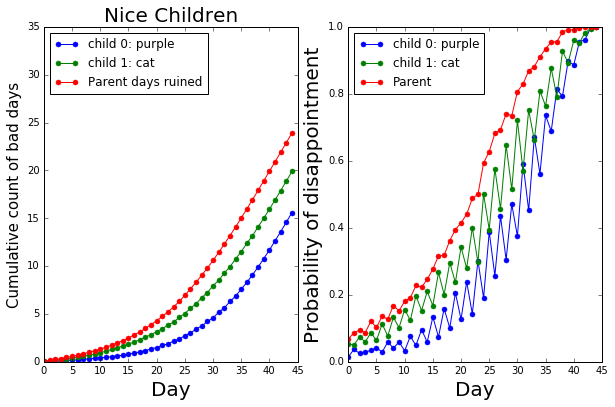

In [3]:
(hs_nice, fa_nice, fi_nice, fp_nice, fm_nice) = \
    vp.runandplot(numsims, Num_bot, Num_col, Num_shp, Num_off, ['a','0'], [0,0,1,1], 'Nice Children', 'Nice')

The left figure shows a cumulative count of unhappy days for each member of the group (2 children & parent). On average, Child A (purple) has 16 days over the life of the bottle when they do not get any preferred vitamins (blue curve). Child B (cat) has 20 days that they do not get their preferred vitamins (green curve), out of a total of 45 days. If we assume that either child having a fit ruins the parent's day, we reach a count of 24 out of 45 days ruined for the parent (red curve). The right hand figure shows the probability of no preferred vitamin on each day for each child. The zig-zag pattern stems from the turn-taking structure. The child who chooses first always has a lower chance of disappointment than the child who chooses second. 

Next we consider the same set-up, but now we simulate "Mean" children who choose the other child's preferred vitamin if possible without compromising on their own preferences, again, we simulate 500 vitamin bottles and average in order to understand the overall behavior. 

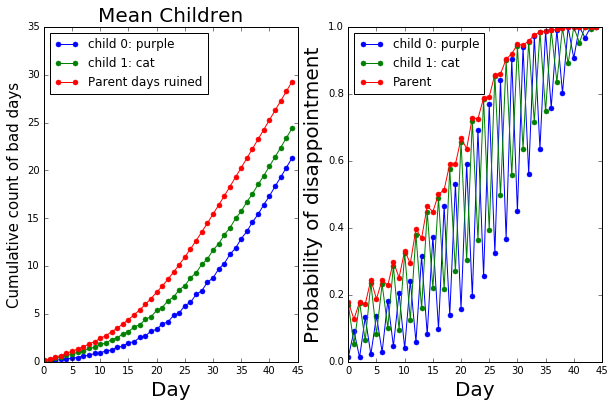

In [4]:
(hs_mean, fa_mean, fi_mean, fp_mean, fm_mean) = \
    vp.runandplot(numsims, Num_bot, Num_col, Num_shp, Num_off, ['a','0'], [0,0,1,1], 'Mean Children', 'Mean')

In this case, all parties have a higher level of unhappiness. On average, Child A has a total of 21 bad days over the life of the vitamin bottle (blue), Child B (cat) has 25 bad days over the life of the bottle, and the parent has almost 30 ruined days (out of 45). The mean children really do make it more awful for everyone. Note that the zig zag pattern that indicates the role of turn-taking gets much wider. This is because the child who is choosing first has more power to ruin the day of the child choosing second, resulting in wider fluctuations. 

Next we consider the (most likely entirely fictional) "Practical" children. These children realize that one preferred vitamin makes them happy enough. Thus, even if two preferred vitamins are offered, they only take one (they are also nice, avoiding their sibling's vitamin if possible). 

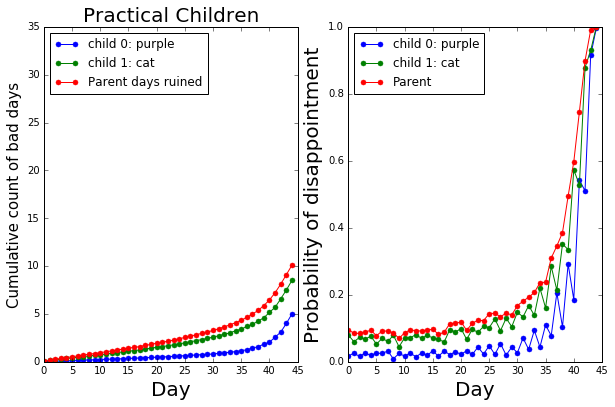

In [5]:
(hs_pract, fa_pract, fi_pract, fp_pract, fm_pract) = \
    vp.runandplot(numsims, Num_bot, Num_col, Num_shp, Num_off, ['a','0'], [0,0,1,1], 'Practical Children', 'Pract')

In this case, Child A (purple) has 8 ruined days, Child B (cat) has 5 ruined days, and the parent has 10 ruined days out of 45. These practical children are really amazing. While they are almost certainly disappointed near the end of the bottle when even with this impressive show of restraint, their preferred vitamins have run out due to the cruel realities of a probabilistic process. But overall, everyone in the triad, including the parent, does not experience crushing vitamin disappointment the vast majority of the time. Note also that the fluctuations induced by turn-taking are much smaller here than in the prior two cases.

We can more clearly see the role of vitamin choice strategy in modulating disappointment, by plotting each person's cumulative count of disapointing days as they vary with choice strategy.  

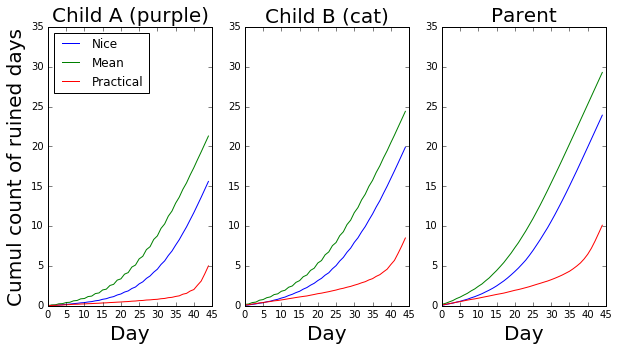

In [6]:
plt.figure(figsize=(10,5))
choice_type = ['Nice', 'Mean', 'Practical']
title_str = ['Child A (purple)', 'Child B (cat)', 'Parent']
for i in [0,1,2]:
    # plot cumulative ruined days for each person, in all three cases
    plt.subplot(1,3,i+1)
    plt.plot(np.vstack((fa_nice[:,i], fa_mean[:,i], fa_pract[:,i])).T)
    if i == 0: 
        plt.legend(choice_type, loc=2)
        plt.ylabel('Cumul count of ruined days', fontsize=20)
    plt.title(title_str[i], fontsize=20)
    plt.xlabel('Day', fontsize=20)
    plt.ylim([0,35])

## Answers to original problem:

To a first approximation, we now understand important dynamics in the problem as originally stated, though some analysis does remain. First, we have a strong approximation of the probability of happiness for each child on each day, and also an approximation of the probability of parent happiness. We can derive the probabilities on the requested days as follows (note here these results are specific to Child A choosing first): 

In [7]:
P_childA_happy = np.vstack((1-fp_nice[:,0], 1-fp_mean[:,0], 1-fp_pract[:,0])).T
P_childB_happy = np.vstack((1-fp_nice[:,1], 1-fp_mean[:,1], 1-fp_pract[:,1])).T
P_parent_happy = np.vstack((1-fp_nice[:,2], 1-fp_mean[:,2], 1-fp_pract[:,2])).T

# Problem requests days 1, 20 & 45, increment back by 1 due to zero indexing
select_days = [0, 19, 44]

In [8]:
for c,choice in enumerate(choice_type):
    print('Child A, Purple, Choice type: ' + choice)
    for i in [0, 1, 2]:
        print('Probability Happy on Day ' + str(select_days[i]+1) + ': ' + str(P_childA_happy[select_days[i],c]))
    print('\n')

Child A, Purple, Choice type: Nice
Probability Happy on Day 1: 0.985
Probability Happy on Day 20: 0.794
Probability Happy on Day 45: 0.0


Child A, Purple, Choice type: Mean
Probability Happy on Day 1: 0.986
Probability Happy on Day 20: 0.469
Probability Happy on Day 45: 0.0


Child A, Purple, Choice type: Practical
Probability Happy on Day 1: 0.983
Probability Happy on Day 20: 0.97
Probability Happy on Day 45: 0.003




In [9]:
for c,choice in enumerate(choice_type):
    print('Child B, Cat, Choice type: ' + choice)
    for i in [0, 1, 2]:
        print('Probability Happy on Day ' + str(select_days[i]+1) + ': ' + str(P_childB_happy[select_days[i],c]))
    print('\n')

Child B, Cat, Choice type: Nice
Probability Happy on Day 1: 0.946
Probability Happy on Day 20: 0.763
Probability Happy on Day 45: 0.0


Child B, Cat, Choice type: Mean
Probability Happy on Day 1: 0.829
Probability Happy on Day 20: 0.729
Probability Happy on Day 45: 0.0


Child B, Cat, Choice type: Practical
Probability Happy on Day 1: 0.92
Probability Happy on Day 20: 0.911
Probability Happy on Day 45: 0.0




In [10]:
for c,choice in enumerate(choice_type):
    print('Parent, Choice type: ' + choice)
    for i in [0, 1, 2]:
        print('Probability Happy on Day ' + str(select_days[i]+1) + ': ' + str(P_childB_happy[select_days[i],c]))
    print('\n')

Parent, Choice type: Nice
Probability Happy on Day 1: 0.946
Probability Happy on Day 20: 0.763
Probability Happy on Day 45: 0.0


Parent, Choice type: Mean
Probability Happy on Day 1: 0.829
Probability Happy on Day 20: 0.729
Probability Happy on Day 45: 0.0


Parent, Choice type: Practical
Probability Happy on Day 1: 0.92
Probability Happy on Day 20: 0.911
Probability Happy on Day 45: 0.0




We have also demonstrated that on a given day, it does matter which child chooses first, especially if the simulated children are "Mean", in which case the child choosing first has a great deal of power to ruin the day of the other child (and thus the parent). It remains to analyze and calculate the probability of direct conflict, that is, days that both children want the same vitamin.

# Three-Children Simulation

A first interesting expansion problem is to consider three children choosing vitamins. As a first step, we consider a third child who prefers lion vitamins (note the answers would be somewhat different if the third child preferred a aspecific color). We again examine results from 500 simulated vitamin bottles for "Nice," "Mean," and "Practical" vitamin selection strategies resulting in the following: 

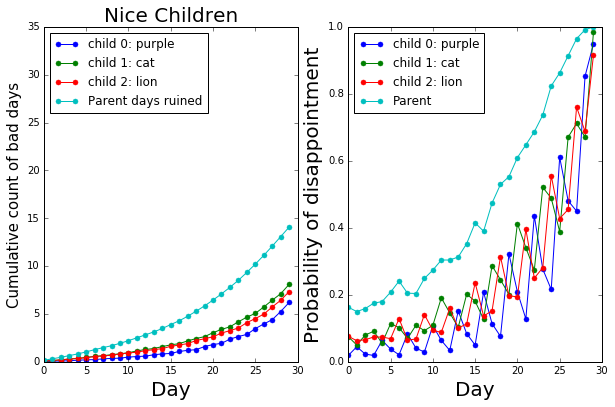

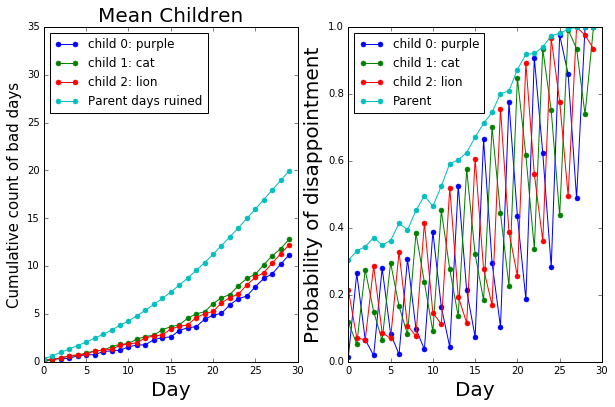

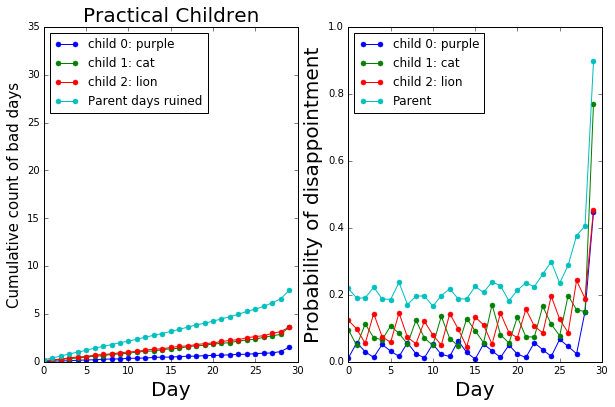

In [11]:
(hs_nice_3, fa_nice_3, fi_nice_3, fp_nice_3, fm_nice_3) = \
    vp.runandplot(numsims, Num_bot, Num_col, Num_shp, Num_off, ['a','0','1'], [0,0,1,1,2,2], 'Nice Children', 'Nice')
(hs_mean_3, fa_mean_3, fi_mean_3, fp_mean_3, fm_mean_3) = \
    vp.runandplot(numsims, Num_bot, Num_col, Num_shp, Num_off, ['a','0','1'], [0,0,1,1,2,2], 'Mean Children', 'Mean')
(hs_pract_3, fa_pract_3, fi_pract_3, fp_pract_3, fm_pract_3) = \
    vp.runandplot(numsims, Num_bot, Num_col, Num_shp, Num_off, ['a','0','1'], [0,0,1,1,2,2], 'Practical Children', 'Pract')

It is now interesting to compare whether children and parents are happier or more disappointed overall in the 2-kid or the 3-kid arrangement. We calculate the overall proportion of happy days for each parent and child (note however, we cannot compare the third child). We calculate the proportion of happy days over the life of the bottle, and assume that this represents an overall proportion of happy days, since presumably a new bottle is started as soon as the first bottle runs out, disregarding any possible gap days due to needing to get to the store as likely insignificant, and also noting that it is difficult to quantify whether happiness would increase or decrease on any gap days. 

In [12]:
# Calculate proportion of days that people are happy
prop_sad_2=np.ones((4,3),dtype=float)
prop_sad_3=np.ones((4,3),dtype=float)
badday_avg_2=[fa_nice[-1], fa_mean[-1], fa_pract[-1]]
badday_avg_3=[fa_nice_3[-1], fa_mean_3[-1], fa_pract_3[-1]]
for person in [0,1,2,3]:
    for c, choice in enumerate(choice_type):
        if person < 2:
            prop_sad_2[person][c]=badday_avg_2[c][person]/45
        elif person == 3:
            prop_sad_2[person][c]=badday_avg_2[c][-1]/45
        prop_sad_3[person][c]=badday_avg_3[c][person]/30
        
perc_happy_2 = 100*(1-prop_sad_2)
perc_happy_3 = 100*(1-prop_sad_3)

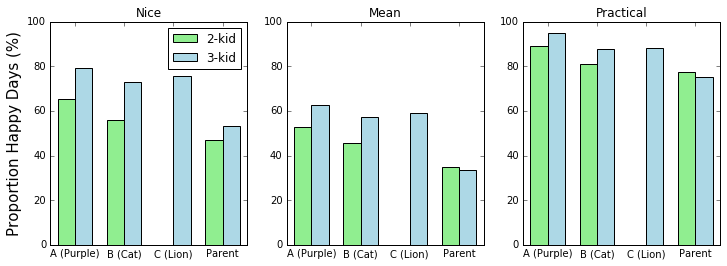

In [13]:
# plot bar graph of happiness, comparing 2-kid and 3-kid 
plt.subplots(figsize=(12,4))
ind = np.arange(4)+1
bw = 0.35
for c, choice in enumerate(choice_type):
    ax = plt.subplot(1,3,c+1)
    plt.bar(ind-bw, perc_happy_2[[0,1,2,3],c], width=bw, color = 'lightgreen')
    plt.bar(ind, perc_happy_3[[0,1,2,3],c], width=bw, color = 'lightblue')
    plt.ylim([0,100])
    plt.title(choice)
    if c == 0:
        plt.legend(['2-kid', '3-kid'])
        plt.ylabel('Proportion Happy Days (%)', fontsize=15)
    ax.set_xticks(ind)
    ax.set_xticklabels(['A (Purple)', 'B (Cat)', 'C (Lion)','Parent'])

For all three choice strategies, the kids in the 3-kid arrangement have a greater proportion of days on which they get their preferred vitamins than they would have in the 2-kid arrangement. This is because there is a 3rd kid removing some of their own non-preferred vitamins. (If the children had more substantially overlapping preferences, this would not be true and happiness would decrease substantially in the three-kid). Even though the children fare better in this scenario, the parent only does better in the three-kid scenario when children use the "Nice" vitamin selection strategy, and the improvement for the parent is not as substantial as for the kids. Since a parent's day is ruined when even one child has a fit, with three children, even though the children are happier, there are more children to be disappointed, which offsets the improvement for the parent. 

## Discussion & Future Directions

While further analysis is certainly warranted, we have developed a deeper understanding of the vitamin problem with our simulated analysis. We have established that the aggression of vitamin selection strategy has a profound impact on overall family happiness, and we have also established that if there were any way at all to convince children to delay gratification, even slightly, the world would be a better place. We have also compared the happiness of family members when three children as opposed to two children are selecting vitamins from the same bottle. Perhaps counterintuitively, this analysis indicates that at least in this model system, children may be happier overall in a three-child family than a two-child family, though parents will fare similarly overall. Indeed, near perfect family harmony can be achieved in a family of either four children in which all children prefer different colors, or a three child family in which all children prefer different colors (analysis not shown). 

An important next step in understanding this vitamin system is expanding this preliminary work using simulated vitamin bottles and children to develop more precise mathematical calculation of the underlying probability structures. Further, there are several additional possible directions for future work. First, we can use this existing simulation system to explore the influence that the degree of overlap between child vitamin preferences has on overall family satisfaction. We also have not yet performed a deeper analysis of of so-called "nuclear purple cat" events, when only a single preferred vitamin is offered, and it is desired by multiple children. We have also not considered interactions between the children and the role these may play in vitamin choice and family happiness. For example, we suggest consideration of a model in which children are benevolent in their choices, perhaps even practical, until one child is forced to take another child's preferred vitamin, which prompts a switch to retaliatory aggressive vitamin choice. Deeper game theoretic consideration of strategic vitamin choice is also warranted. 

Perhaps most importantly, this analysis motivates the development of a parallel line of psychological work to establish techniques to convince children to delay gratification. Our model clearly predicts that if children could recognize that a second preferred vitamin has greater value if left in the jar, overall happiness for all family members would increase dramatically. 